In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\mande\OneDrive\Documents\Instacart Basket folder 20th April 2023'

Part 1 
step 1
Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [3]:
df_all_merge = pd.read_pickle(os.path.join(path, 'Data', 'Prepared data', '4.9_df_merged'))

In [4]:
department = pd.read_csv(os.path.join(path, 'Data', 'prepared data', 'departments_wrangled.csv'))

In [5]:
department.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [6]:
dept_dict = dict(zip(department["department_id"], department["department"]))

In [7]:
dept_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [8]:
df_all_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Ture
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


#Step 2 
Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

Yes, there are potential security implications with the data, particularly with Personally Identifiable Information (PII) that can be used to identify an individual.

Full name, date of joining, age, and state of customers can all be considered PII. If this information is not properly secured, it could be used by malicious actors for identity theft, financial fraud, or other malicious purposes.

# Step 3
The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [9]:
# Define the region mapping
region_map = {
    'Connecticut': 'Northeast',
    'Maine': 'Northeast',
    'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New York': 'Northeast',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'Vermont': 'Northeast',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Missouri': 'Midwest',
    'Nebraska': 'Midwest',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'South Dakota': 'Midwest',
    'Wisconsin': 'Midwest',
    'Alabama': 'South',
    'Arkansas': 'South',
    'Delaware': 'South',
    'Florida': 'South',
    'Georgia': 'South',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maryland': 'South',
    'Mississippi': 'South',
    'North Carolina': 'South',
    'Oklahoma': 'South',
    'South Carolina': 'South',
    'Tennessee': 'South',
    'Texas': 'South',
    'Virginia': 'South',
    'West Virginia': 'South',
    'Alaska': 'West',
    'Arizona': 'West',
    'California': 'West',
    'Colorado': 'West',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Montana': 'West',
    'Nevada': 'West',
    'New Mexico': 'West',
    'Oregon': 'West',
    'Utah': 'West',
    'Washington': 'West',
    'Wyoming': 'West'
}

# Add a new column "Region" to the dataset
df_all_merge['Region'] = df_all_merge['STATE'].map(region_map)

In [10]:
crosstab = pd.crosstab(df_all_merge['Region'], df_all_merge['spending_flag'], dropna = False)

In [11]:
crosstab.to_clipboard()

In [12]:
crosstab

spending_flag,Higer spender,Low spender
Region,,
Midwest,149962,7033091
Northeast,101535,5325733
South,184334,9448457
West,148255,7690677


<Axes: >

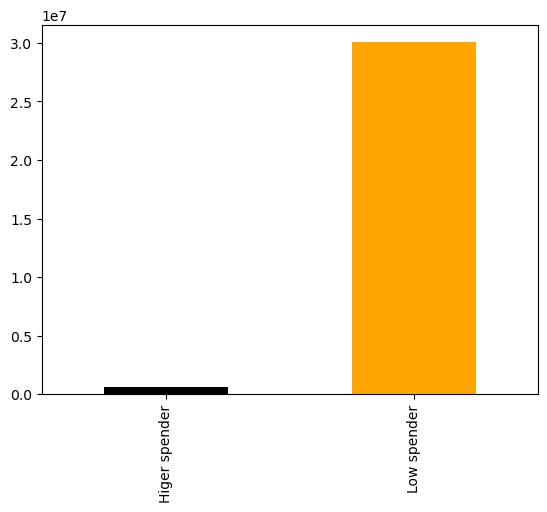

In [13]:
df_all_merge['spending_flag'].value_counts().sort_index().plot.bar(color = ['black', 'orange'])

#step 4
The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [14]:
 df_all_merge.loc[df_all_merge['max_order']< 5, 'activity_of_customers'] = 'Low order customer'

In [15]:
df_all_merge.loc[df_all_merge['max_order'] >= 5, 'activity_of_customers'] = 'High order customer'

In [16]:
df_all_merge['activity_of_customers'].value_counts(dropna = False)

High order customer    29297366
Low order customer      1359981
Name: activity_of_customers, dtype: int64

<Axes: >

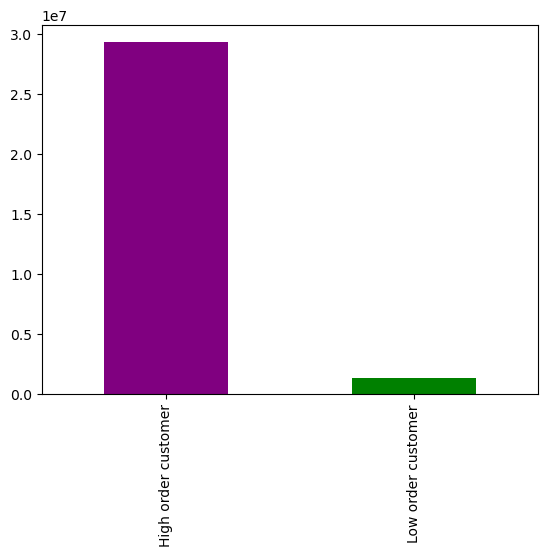

In [17]:
df_all_merge['activity_of_customers'].value_counts().sort_index().plot.bar(color = ['purple', 'green'])

In [18]:
#df_all_merge.to_pickle(os.path.join(path,'Data','prepared Data','low and high acitvity customers'))

#Appropriate visualization

# STEP 4
 customer profiling 

In [19]:
df_all_merge.loc[df_all_merge['Age'] <= 40, 'age_profile'] = '18 year to 40 year'

In [20]:
df_all_merge.loc[(df_all_merge['Age'] >41) & (df_all_merge['Age'] <= 65), 'age_profile'] = '41 year to 65 year'

In [21]:
df_all_merge.loc[df_all_merge['Age']  <65, 'age_profile'] = 'More than 65 year'

In [22]:
df_all_merge['age_profile'].value_counts(dropna = False)

More than 65 year     22552721
NaN                    7651333
41 year to 65 year      453293
Name: age_profile, dtype: int64

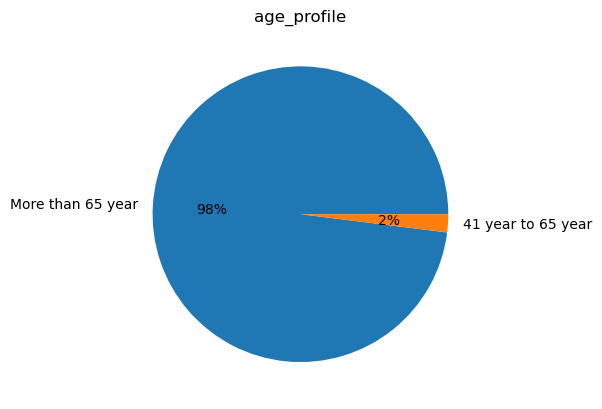

In [23]:
age_pie = df_all_merge['age_profile'].value_counts().plot.pie(title ='age_profile', label = '', autopct=('%1.f%%'))

# Income profile


In [24]:
df_all_merge.loc[df_all_merge['income'] <= 50000, 'Earnings'] = 'Low_income'

In [25]:
df_all_merge.loc[(df_all_merge['income'] > 50000) & (df_all_merge['income'] <= 100000), 'Earnings'] = 'Median_income'


In [26]:
df_all_merge.loc[df_all_merge['income'] > 100000, 'Earnings'] = 'High_income'

In [27]:
df_all_merge['Earnings'].value_counts(dropna = False)

High_income      14021255
Median_income    13244975
Low_income        3391117
Name: Earnings, dtype: int64

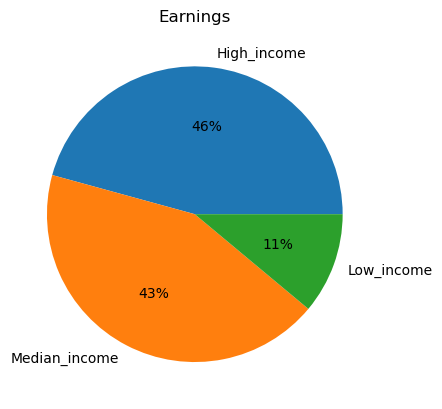

In [50]:
Earning_pie = df_all_merge['Earnings'].value_counts().plot.pie(title ='Earnings', label = '', autopct=('%1.f%%'))

# Department profile 


# Checking how many user eat meat.

In [28]:
 #Diet choice
diet_crosstab = pd.crosstab(df_all_merge['department_id'], df_all_merge['user_id'], dropna = False)

In [29]:
df_all_merge.loc[df_all_merge['department_id'].isin([12, 16]), 'Food choice'] = 'Non vegetarian'


In [30]:
df_all_merge.loc[~df_all_merge['department_id'].isin([12, 16]), 'Food choice'] = 'vegetarian'


In [31]:
df_all_merge['Food choice'].value_counts(dropna = False)

vegetarian        24870571
Non vegetarian     5786776
Name: Food choice, dtype: int64

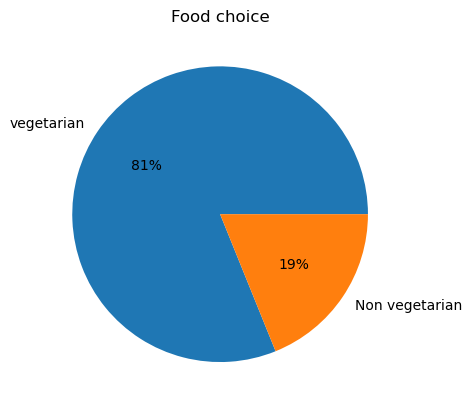

In [51]:
food_pie = df_all_merge['Food choice'].value_counts().plot.pie(title ='Food choice', label = '', autopct=('%1.f%%'))

# Checking customers with babies and pet and without babies and pet

In [32]:
df_all_merge.loc[df_all_merge['department_id'] == 18, 'Customer'] = 'Customer with babies'



In [33]:
df_all_merge.loc[df_all_merge['department_id'] == 8, 'Customer'] = 'Customer with Pet'

In [34]:
df_all_merge.loc[(df_all_merge['department_id'] == 8) & (df_all_merge['department_id'] == 18), 'Customer'] = 'Customer with Pet and babies'

In [35]:
df_all_merge.loc[(df_all_merge['department_id'] != 8) & (df_all_merge['department_id'] != 18), 'Customer'] = 'Customer without Pet and babies'

In [36]:
df_all_merge['Customer'].value_counts()

Customer without Pet and babies    30164709
Customer with babies                 400378
Customer with Pet                     92260
Name: Customer, dtype: int64

<Axes: >

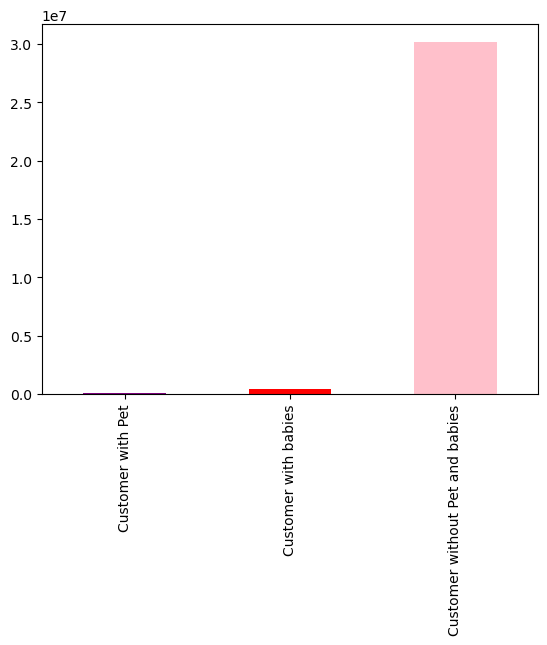

In [63]:




df_all_merge['Customer'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink'])


# Number of dependents 

In [37]:


df_all_merge.loc[df_all_merge['n_dependants'] >= 1, 'Number of dependants'] = 'Families with dependants'

In [38]:
df_all_merge.loc[df_all_merge['n_dependants'] == 0 , 'Number of dependants'] = 'Families without dependants'

In [58]:
df_all_merge[ 'Number of dependants'].value_counts(dropna = False)

Families with dependants       23000378
Families without dependants     7656969
Name: Number of dependants, dtype: int64

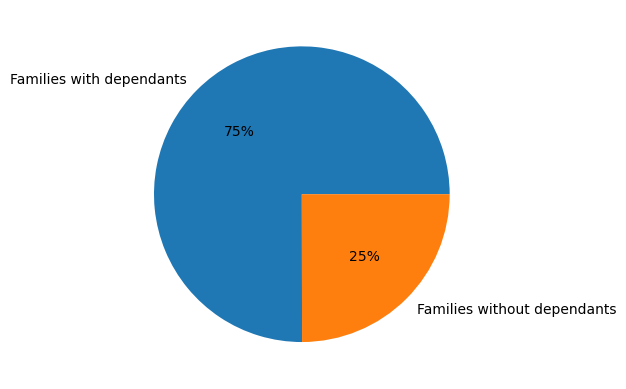

In [59]:
dependant_pie = df_all_merge['Number of dependants'].value_counts().plot.pie(title ='', label = '', autopct=('%1.f%%'))

In [40]:
#df_all_merge[['Number of dependants', 'age_profile', 'Earnings', 'activity_of_customers']].describe()

In [41]:
df_all_merge[['n_dependants','Age', 'income',]].describe()

,n_dependants,Age,income
count,3.065735e+07,3.065735e+07,3.065735e+07
mean,1.501689e+00,4.947334e+01,9.945696e+04
std,1.118474e+00,1.847857e+01,4.306362e+04
min,0.000000e+00,1.800000e+01,2.590300e+04
25%,1.000000e+00,3.300000e+01,6.706600e+04
50%,2.000000e+00,4.900000e+01,9.661000e+04
75%,3.000000e+00,6.500000e+01,1.279300e+05
max,3.000000e+00,8.100000e+01,5.939010e+05


# Step 8
 
 In this 8th step i have made a copy of df and than change the department id with department name so it is easy to do crosstap and easy to understand what department was in more in demand  in what regin.

In [42]:
department_region = df_all_merge[['department_id', 'Region','spending_flag']]

In [43]:
department_region

,department_id,Region,spending_flag
0,7,South,Low spender
1,7,South,Low spender
2,7,South,Low spender
3,7,South,Low spender
4,7,South,Low spender
...,...,...,...
30657342,7,West,Higer spender
30657343,12,South,Low spender
30657344,12,South,Low spender
30657345,12,South,Low spender


In [44]:

department_region = df_all_merge[['department_id', 'Region','spending_flag']].copy()
department_names = {1: 'frozen', 2: 'other', 3: 'bakery', 4: 'produce', 5: 'alcohol', 6: 'international', 7: 'beverages', 8: 'pets', 9: 'dry goods pasta', 10: 'bulk', 11: 'personal care', 12: 'meat seafood', 13: 'pantry', 14: 'breakfast', 15: 'canned goods', 16: 'dairy eggs', 17: 'household', 18: 'babies', 19: 'snacks', 20: 'deli', 21: 'missing'}

department_region['department_name'] = department_region['department_id'].replace(department_names)


In [45]:
department_region.head(3)

,department_id,Region,spending_flag,department_name
0,7,South,Low spender,beverages
1,7,South,Low spender,beverages
2,7,South,Low spender,beverages


In [46]:
crosstab_dep_reg_spen = pd.crosstab(department_region['department_name'], [department_region['Region'], department_region['spending_flag']], dropna=False)


In [47]:

crosstab_dep_reg_spen = crosstab_dep_reg_spen.sort_values(crosstab_dep_reg_spen.columns[0], ascending=False)

In [48]:
crosstab_dep_reg_spen

Region                Midwest                 Northeast              \
spending_flag   Higer spender Low spender Higer spender Low spender   
department_name                                                       
produce                 30884     2076218         21165     1560333   
dairy eggs              27324     1169670         17421      886345   
beverages               15360      575322          9726      447508   
snacks                  12378      623916          8077      479527   
frozen                  10930      483239          7773      362527   
pantry                   8930      408248          6580      305815   
bakery                   6589      253417          4786      193764   
household                6389      159385          4391      120157   
meat seafood             5269      151561          3768      114743   
canned goods             4867      232082          3400      173919   
dry goods pasta          4208      188556          2641      141500   
deli                     3960      228478          2749      173868   
breakfast                3480      152661          2392      115616   
alcohol                  2932       31947          2646       22621   
personal care            2495       96912          1652       73029   
babies                   1194       91914           524       71047   
international            1168       58884           703       43767   
pets                     1152       20024           771       16655   
missing                   224       15321           178       11498   
other                     200        7621           169        6076   
bulk                       29        7715            23        5418   

Region                  South                      West              
spending_flag   Higer spender Low spender Higer spender Low spender  
department_name                                                      
produce                 39405     2784801         31127     2255202  
dairy eggs              34062     1574050         26266     1285248  
beverages               17642      783778         14031      629365  
snacks                  13440      839818         11544      690167  
frozen                  14129      653811         11328      530207  
pantry                  11624      542424          9355      444504  
bakery                   8524      337807          7019      278975  
household                7026      208593          6007      170816  
meat seafood             6665      203902          5306      167392  
canned goods             5975      311571          5517      253459  
dry goods pasta          4727      251284          4080      207374  
deli                     5327      306217          3905      250316  
breakfast                4677      205249          3770      169702  
alcohol                  3593       42056          2998       34436  
personal care            2842      130552          2364      103484  
babies                   1532      126329          1016       99610  
international            1293       78143          1298       64310  
pets                     1171       26842           796       23344  
missing                   285       20677           209       15929  
other                     353       10376           299        8264  
bulk                       42       10177            20        8573

# Produce suitable charts to illustrate your results and export them in your project folder.

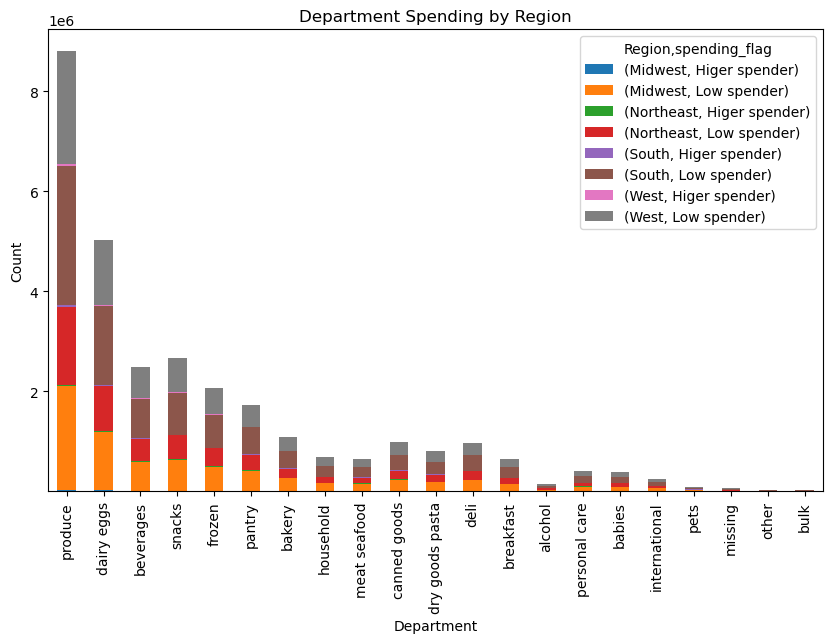

In [49]:
#plot the crosstab as a stacked bar chart
crosstab_dep_reg_spen.plot(kind='bar', stacked=True, figsize=(10, 6))

# set the title and axis labels
plt.title('Department Spending by Region')
plt.xlabel('Department')
plt.ylabel('Count')

# show the plot
plt.show()

In [64]:
df_all_merge.to_pickle(os.path.join(path,'Data','prepared Data','4.10_df_merged'))